The following contains data from the Hubble Space Telescope and the IKI Observatory (Institut Kosmicheskih Issledovanyi, Russia), of the Eagle Nebula, M16.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

In [3]:
fits

<module 'astropy.io.fits' from 'C:\\Users\\Vedang\\anaconda3\\lib\\site-packages\\astropy\\io\\fits\\__init__.py'>

In [4]:
M16 = fits.open('Ha_registered.fit')

In [5]:
M16

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001A7EF3EB610>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1827880>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F18772E0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F18774F0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877700>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877910>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877B20>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877D30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877F40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1887190>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F18873A0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F18875B0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877F70>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F1877CD0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A7F18

In [6]:
M16.info()

Filename: Ha_registered.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     433   (2721, 2172)   float32   
  1  Thumbnail     1 ImageHDU         8   (400, 319)   uint8   
  2  Instrument:Camera:Gain    1 ImageHDU         7   (8,)   uint8   
  3  Instrument:Camera:Name    1 ImageHDU         7   (42,)   uint8   
  4  Instrument:Camera:XBinning    1 ImageHDU         7   (4,)   uint8   
  5  Instrument:Camera:YBinning    1 ImageHDU         7   (4,)   uint8   
  6  Instrument:Filter:Name    1 ImageHDU         7   (4,)   uint8   
  7  Instrument:Telescope:Name    1 ImageHDU         7   (28,)   uint8   
  8  Observation:Location:Elevation    1 ImageHDU         7   (4,)   uint8   
  9  Observation:Location:Latitude    1 ImageHDU         7   (8,)   uint8   
 10  Observation:Location:Longitude    1 ImageHDU         7   (8,)   uint8   
 11  Observation:Object:Name    1 ImageHDU         7   (6,)   uint8   
 12  Observation:Time:End    1 ImageHDU  

In [7]:
M16[0]

In [8]:
M16[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2721 / length of data axis 1                          
NAXIS2  =                 2172 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PROGRAM = 'PixInsight 01.08.06.1457' / Software that created this HDU           
COMMENT PixInsight Class Library: PCL 02.01.11.0938                             
COMMENT FITS module version 01.01.05.0433                                       
COLORSPC= 'Grayscale'          / PCL: Color space                               
RESOLUTN=                  7

In [9]:
M16[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  400 / length of data axis 1                          
NAXIS2  =                  319 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'Thumbnail'          / PCL 02.01.11.0938                              

In [10]:
data=M16[0].data

In [11]:
data.dtype.name

'float32'

In [12]:
print ('Min', np.min(data))
print ('Max', np.max(data))
print ('Mean', np.mean(data))
print ('SD', np.std(data))


Min 0.0034116413
Max 1.0
Mean 0.0072852946
SD 0.011557344


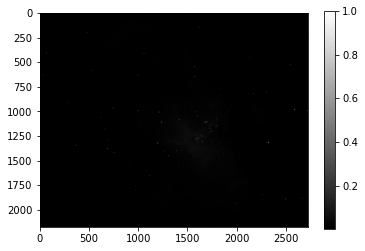

In [13]:
plt.imshow(data, cmap='gray')
plt.colorbar()

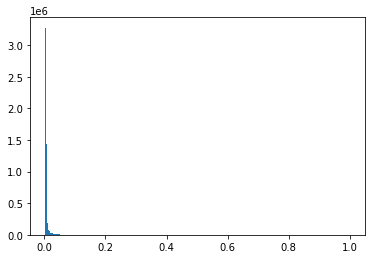

In [14]:
histrogram = plt.hist(data.flat, bins=500)

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

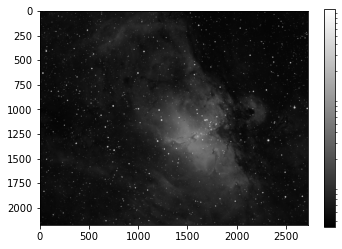

In [15]:
from matplotlib.colors import LogNorm

plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [16]:
from astropy.visualization import make_lupton_rgb

In [17]:
M16ha = fits.open('Ha_registered.fit')
M16oiii = fits.open('OIII_registered.fit')
M16sii = fits.open('SII_registered.fit')

# Filters used
 
## Ha filter
The Ha_registered.fit contains data from a Hydrogen alpha filter. Since hydrogen alpha line corresponds to **656.281nm** (n=2 to n=1), the filter is used for red spectrum of visible light.

## OIII filter
The OIII_regsitered.fit contains data from a Oxygen-III filter. It  corresponds to **501nm**

## SII filter
The SII_regsitered.fit contains data from a Sulphur-II filter. It corresponds to **672nm**

In [18]:
g=M16sii[0].data
r=M16ha[0].data
b=M16oiii[0].data

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

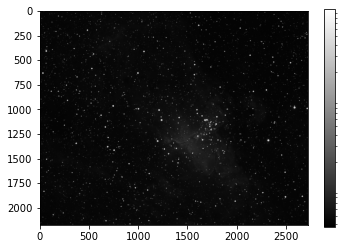

In [19]:
from matplotlib.colors import LogNorm

plt.imshow(g, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

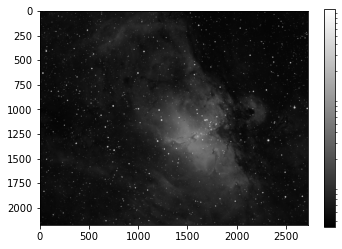

In [20]:
from matplotlib.colors import LogNorm

plt.imshow(r, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

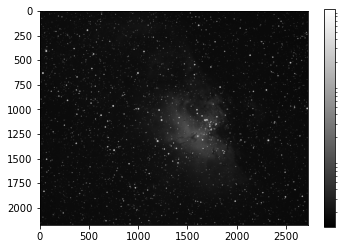

In [21]:
from matplotlib.colors import LogNorm

plt.imshow(b, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

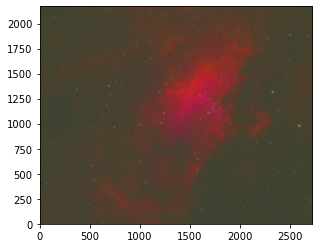

In [22]:
rgb_default = make_lupton_rgb(r,g,b*1.8,stretch=0.005,Q=20)

plt.imshow(rgb_default, origin='lower')
plt.savefig('IKIM16-1.jpg')

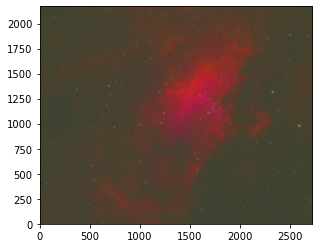

In [23]:
rgb_default = make_lupton_rgb(r,g,b*1.8,stretch=0.005,Q=20)

plt.imshow(rgb_default, origin='lower')
plt.savefig('IKIM16-2.png')

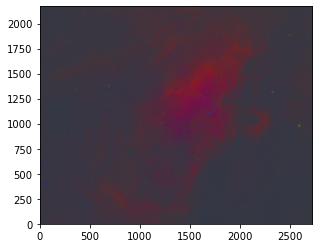

In [24]:
rgb_default = make_lupton_rgb(r,(g)/1,b*3,stretch=0.0001,Q=500)

plt.imshow(rgb_default, origin='lower')
plt.savefig('IKIM16-3.png')

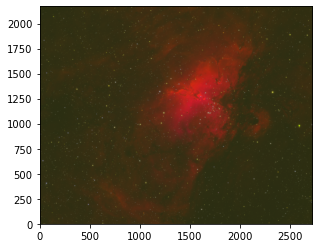

In [25]:
rgb_default = make_lupton_rgb(r,g,b,stretch=0.02,Q=10)

plt.imshow(rgb_default, origin='lower')
plt.savefig('IKIM16-4.jpg')

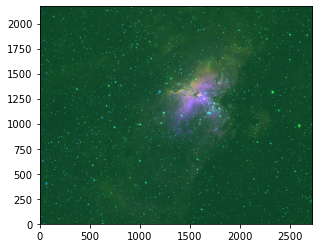

In [58]:
rgb_default = make_lupton_rgb(r*0.2,g,b*1.4,stretch=0.015,Q=0.1)

plt.imshow(rgb_default, origin='lower')
plt.savefig('IKIM16-5.jpg', dpi=300)
plt.savefig('IKIM16-5.svg',format='svg',dpi=500)

The above image was taken from the IKI (Institut Kosmicheskih Issledovanyi, Russia) Open observatory from earth.
https://stargazerslounge.com/topic/360782-iko-m16-data-release-august-2020/

Naturally, it's data is very limited and of low quality.

# Hubble Telescope Observation

The following contains data obtained from the Hubble Space telescope. It is specifically an iconic image which was released soon after the first fixes on the telescope after it was found to have very low resolving power, comparable to telescopes on the Earth. The ***Pillars of Creation*** are a very iconic image, found at the heart of the M16 Eagle Nebula.

The camera is called WFC3 - Wide field camera 3, and has 2 broad channels- IR and UV.
This image used 3 visible range observations of 502nm, 657nm and 673nm, mapped to b,g,r in the output.

Data in FITS file is present as a queue, with the first element carrying the most important data i.e. the signal data from the sensor. We simply open the file, extract data, and plot it in rgb (8-bit) colourspace

In [32]:
m16=fits.open('hlsp_heritage_hst_wfc3-ir_m16_f110w_v1_drz.fits')

In [33]:
m16

In [34]:
m16.info()

Filename: hlsp_heritage_hst_wfc3-ir_m16_f110w_v1_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     933   (4000, 4200)   float32   


In [35]:
m16[0]

In [36]:
m16[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4000 / Axis length                                    
NAXIS2  =                 4200 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2014-10-27T16:16:14' / Date FITS file was generated                  
IRAF-TLM= '2014-10-27T16:16:11' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FILENAME= 'f110w_rscale_sc08px10_drz_sci.fits' / name of file                   
FILETYPE= 'SCI      '       

In [37]:
m16502=fits.open('hlsp_heritage_hst_wfc3-uvis_m16_f502n_v1_drz.fits')
m16657=fits.open('hlsp_heritage_hst_wfc3-uvis_m16_f657n_v1_drz.fits')
m16673=fits.open('hlsp_heritage_hst_wfc3-uvis_m16_f673n_v1_drz.fits')

In [38]:
d1=m16502[0].data
d2=m16657[0].data
d3=m16673[0].data

In [39]:
print ('Min', np.min(d1))
print ('Max', np.max(d1))
print ('Mean', np.mean(d1))
print ('SD', np.std(d1))

Min -7577.9688
Max 46365.215
Mean 0.032396544
SD 7.919431


In [40]:
print ('Min', np.min(d2))
print ('Max', np.max(d2))
print ('Mean', np.mean(d2))
print ('SD', np.std(d2))

Min -444234.56
Max 25237.35
Mean 0.14024794
SD 101.3765


In [41]:
from astropy.visualization import make_lupton_rgb

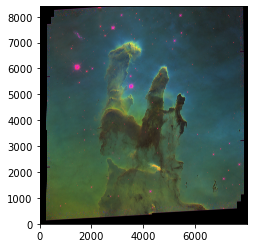

In [42]:
rgb_default = make_lupton_rgb(d3,d2/7,d1,stretch=0.08,Q=4)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-2.svg',format='svg',dpi=1200)

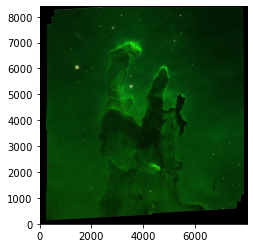

In [43]:
rgb_default = make_lupton_rgb((d3),d2,d1,stretch=1,Q=4)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-1.jpg')

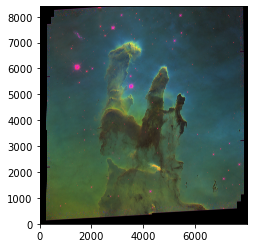

In [44]:
rgb_default = make_lupton_rgb(d3,d2/7,d1,stretch=0.08,Q=4)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-2.jpg')

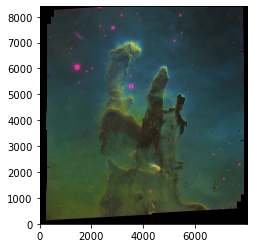

In [45]:
rgb_default = make_lupton_rgb(d3,d2/7,d1,stretch=0.1,Q=4)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-3.jpg')

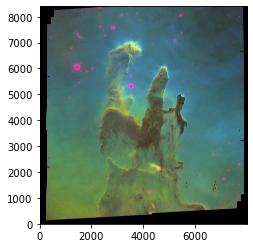

In [46]:
rgb_default = make_lupton_rgb((d3),d2/7,d1,stretch=0.05,Q=4)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-4.jpg')

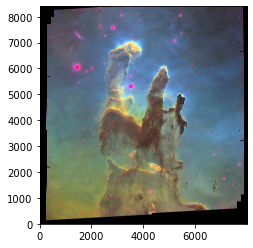

In [47]:
rgb_default = make_lupton_rgb((d3),d2/9,d1*0.9,stretch=0.05,Q=2)

plt.imshow(rgb_default, origin='lower')
plt.savefig('HSTM16-5.jpg')

## Understanding the astropy.visualisation.make_lupton_rgb function

The function is used to create an 8-bit rgb image using data from three different filters.

-The first three parameters are for the red, green, blue ranges of colours in the final output. It accepts a numpy.ndarray for each of r, g, b arguments.  

-If any one colour have high intensity, python gives the facility to simply divide/multiply the array by a constant. This **scales** the output of that colour. For example, in M16 observations of the Hubble Space telescope, the 657nm intensity is much higher than others. As a result, it must be scaled down by factor of 1/7 for better result. 

-Next is actually a minimum argument, which we do not use here, and is used to set a threshold for intensity to be plotted. This can be useful to **get rid of noise** in the image which is generally of lower intensity. It's default value is 0. 

-The stretch value (default=5) is used to specify linear stretch of the image. It is dampen the intensity of the signal by a factor equal to it's value. This also allows us to amplify the signal intensity for better viewing. It increases the **brightness** of the image.

-The Q value (default=8) is the asinh softening parameter. It has roughly an inverse relationship with the **contrast** of the signal intensities in output.

-Finally, a filename parameter can accept a string to the file in the project folder where the image output can be overwritten.